In [1]:
from experiment import Experiment
%matplotlib inline

In [2]:
var_dict = dict(
    categorical_vars = ['Work_accident', 'promotion_last_5years', 'sales', 
                        'salary', 'number_project','time_spend_company'],
    numerical_vars = ['satisfaction_level', 'last_evaluation', 'average_montly_hours'],
    class_var = 'left'
)

In [3]:
exp = Experiment('data/HR_comma_sep.csv', 
                 var_dict,
                 embedding_dim=128,
                 lr=0.00001,
                 batch_size=1024,
#                  weight_decay=1.0,
                 n_epoch=200,
                 verbose=False,
                 n_bins_range=range(2, 3),
                 n_init_bins_list=[10])

In [4]:
print('#Numerical Vars =', len(var_dict['numerical_vars']))
print('#Categorical Vars =', len(var_dict['categorical_vars']))
print('#Dummy coded categorical cols =', exp.n_dummy_coded_categorical_cols)

#Numerical Vars = 3
#Categorical Vars = 6
#Dummy coded categorical cols = 17


In [5]:
%time clustering_scores = exp.test_clustering_performance()

CPU times: user 2min 20s, sys: 28.7 s, total: 2min 49s
Wall time: 2min 34s


In [6]:
exp.print_clustering_scores(clustering_scores, method='dummy_only')

kmeans, #Cols = 34, NMI = 0.0019
agglomerative, #Cols = 34, NMI = 0.0115


In [7]:
exp.print_clustering_scores(clustering_scores, method='scale_numeric')

kmeans, #Cols = 34, NMI = 0.0005
agglomerative, #Cols = 34, NMI = 0.2184


In [8]:
exp.print_clustering_scores(clustering_scores, method='equal_width')

kmeans
#Bins = 2, #Cols = 37, #NMI = 0.0001
agglomerative
#Bins = 2, #Cols = 37, #NMI = 0.1536


In [9]:
exp.print_clustering_scores(clustering_scores, method='equal_freq')

kmeans
#Bins = 2, #Cols = 37, #NMI = 0.0013
agglomerative
#Bins = 2, #Cols = 37, #NMI = 0.0160


In [10]:
exp.print_clustering_scores(clustering_scores, method='semantic_binning')

kmeans
#Init Bins = 10, #Cols = 47, NMI = 0.0111
agglomerative
#Init Bins = 10, #Cols = 47, NMI = 0.0590


In [11]:
exp.semantic_binning.bins_by_var

{'average_montly_hours': {'bins': ['(95.999, 137.0]',
   '(137.0, 150.0]',
   '(150.0, 181.0]',
   '(181.0, 200.0]',
   '(200.0, 238.0]',
   '(238.0, 310.0]'],
  'split_point': [95.999, 137.0, 150.0, 181.0, 200.0, 238.0, 310.0]},
 'last_evaluation': {'bins': ['(0.359, 0.78]', '(0.78, 0.95]', '(0.95, 1.0]'],
  'split_point': [0.359, 0.78, 0.95, 1.0]},
 'satisfaction_level': {'bins': ['(0.089, 0.21]',
   '(0.21, 0.49]',
   '(0.49, 0.64]',
   '(0.64, 0.72]',
   '(0.72, 0.85]',
   '(0.85, 0.92]',
   '(0.92, 1.0]'],
  'split_point': [0.089, 0.21, 0.49, 0.64, 0.72, 0.85, 0.92, 1.0]}}

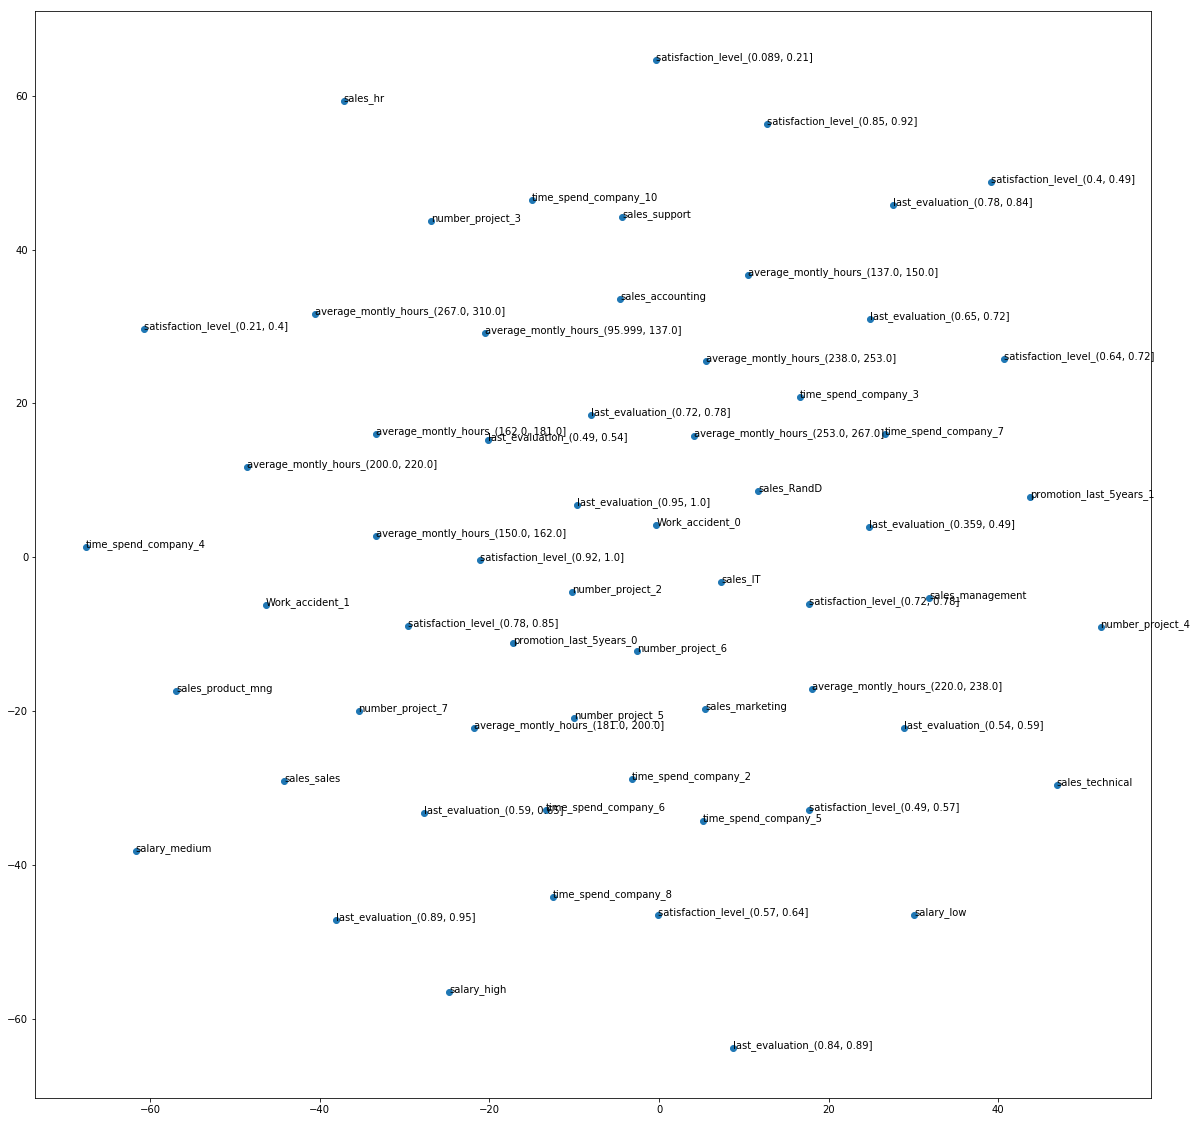

In [13]:
exp.semantic_binning.visualize_bin_embeddings()

### (1) 다른 데이터셋?

### (3) 정성 평가?

### (2) 수렴하면 중도에 멈추도록 하고 싶은데, 체크할 방법?